In [1]:

import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import plotly.express as px
import streamlit as st

In [2]:
st.title('Smart Data Procesing Project')

2024-05-28 18:23:12.465 
  command:

    streamlit run C:\Users\ritaj\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [3]:
st.header('Introduction')

DeltaGenerator()

st.text("In today's data-driven world, smart data processing has become a cornerstone for leveraging the vast amounts of information generated daily. 
This advanced approach to data management involves using sophisticated algorithms, machine learning, and artificial intelligence to transform raw data into actionable insights efficiently and accurately. Smart data processing enables organizations to optimize operations, enhance decision-making, and gain a competitive edge by uncovering patterns, trends, and correlations that were previously inaccessible. By harnessing the power of smart data processing, businesses can turn complexity into clarity, 
fostering innovation and driving growth in an increasingly digital landscape.")

In [4]:
df=pd.read_csv(f'https://raw.githubusercontent.com/mbrajza/content/main/earthquakes_db.csv')

In [5]:
st.header("General Information of the Data")

DeltaGenerator()

In [6]:
st.write(df.dtypes)

2024-05-28 18:23:12.878 Serialization of dataframe to Arrow table was unsuccessful due to: ("Could not convert dtype('O') with type numpy.dtype[object_]: did not recognize Python value type when inferring an Arrow data type", 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [7]:
st.write(df.head())

In [8]:
st.write(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [9]:
st.write(df.describe())

In [10]:
st.write(df.isna().sum())


st.header("1.Data Cleaning")
st.text("Data cleaning is the process of identifying and correcting errors, inconsistencies,\
and inaccuracies in a dataset to improve its quality and reliability. It involves tasks such as\
removing duplicates, filling in missing values, and correcting or removing erroneous data. \
This step is crucial for ensuring the accuracy of data analysis and making informed decisions based on the cleaned data.")

In [11]:
st.write("1.convert the data type of the object by using convert_dtypes function")

In [12]:
df=df.convert_dtypes(infer_objects=True)
st.write(df.dtypes)

2024-05-28 18:23:13.035 Serialization of dataframe to Arrow table was unsuccessful due to: ('Could not convert string[python] with type StringDtype: did not recognize Python value type when inferring an Arrow data type', 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [13]:
st.write(df.dtypes)

2024-05-28 18:23:13.051 Serialization of dataframe to Arrow table was unsuccessful due to: ('Could not convert string[python] with type StringDtype: did not recognize Python value type when inferring an Arrow data type', 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [14]:
st.write('feature engineering has been made from two columns Date and time to create datetime object')

In [15]:
st.text(" 1. change the date column to datetime \
          2. create datetime string\
          3. create datetime columns which have date type datetime\
          4. drop the unwanted columns")

DeltaGenerator()

In [16]:
df['Date']=pd.to_datetime(df['Date'],utc=True)

In [17]:
df['datetime_str'] = df['Date'].dt.year.astype(str) + '-' + \
                     df['Date'].dt.month.astype(str).str.zfill(2) + '-' + \
                     df['Date'].dt.day.astype(str).str.zfill(2) + ' ' + \
                     df['Time']

In [18]:
df['datetime'] = pd.to_datetime(df['datetime_str'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [19]:
df.drop(['Date','Time','datetime_str'],inplace=True,axis=1)

In [20]:
st.write("The filtered columns that we have left is:")
st.write(df.columns)

In [21]:
st.header("which columns are not very important for our story telling and which columns have too much null values probably good to drop them ?")

DeltaGenerator()

In [22]:
df.isna().sum()

Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
datetime                          3
dtype: int64

 The Columns which hold 3/4 percent of data is null, it is better to drop the columns

In [23]:
df_n=df[['datetime','ID','Source','Location Source','Latitude','Longitude','Type','Depth','Magnitude','Magnitude Type','Magnitude Source','Status','Root Mean Square']]

In [24]:
df_n.columns

Index(['datetime', 'ID', 'Source', 'Location Source', 'Latitude', 'Longitude',
       'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
       'Status', 'Root Mean Square'],
      dtype='object')

The measurement which don't have Magnitude type as well as datetime can't convey information so better to drop them.

In [25]:
df['Magnitude Type'].unique()

<StringArray>
['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', <NA>, 'MWB', 'MWW', 'MWR']
Length: 11, dtype: string

In [26]:
np.where(df['Magnitude Type'].isna())

(array([6703, 7294, 7919], dtype=int64),)

In [27]:
df_n=df_n[df_n['Magnitude Type'].isna()==False]

In [28]:
df_n=df_n[df_n.datetime.isna()==False]

Fill the missing value of the Root mean square

In [29]:
df_n['Root Mean Square'].fillna(0,axis=0,inplace=True)

In [30]:
df_n.isna().sum()

datetime            0
ID                  0
Source              0
Location Source     0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Magnitude Source    0
Status              0
Root Mean Square    0
dtype: int64

In [31]:
df_n.dtypes

datetime            datetime64[ns]
ID                          string
Source                      string
Location Source             string
Latitude                   Float64
Longitude                  Float64
Type                        string
Depth                      Float64
Magnitude                  Float64
Magnitude Type              string
Magnitude Source            string
Status                      string
Root Mean Square           Float64
dtype: object

In [32]:
st.write("How to find Outlier in our data?")

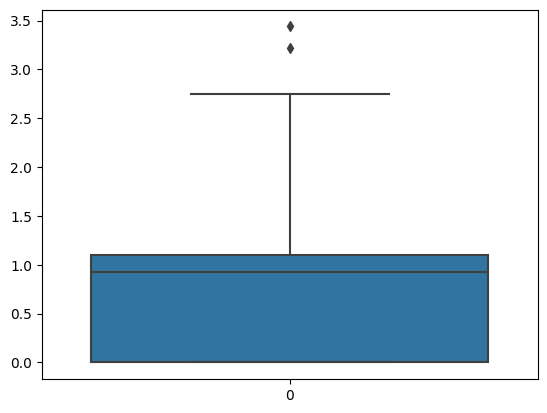

In [33]:
st.write(sns.boxplot(df_n['Root Mean Square']))


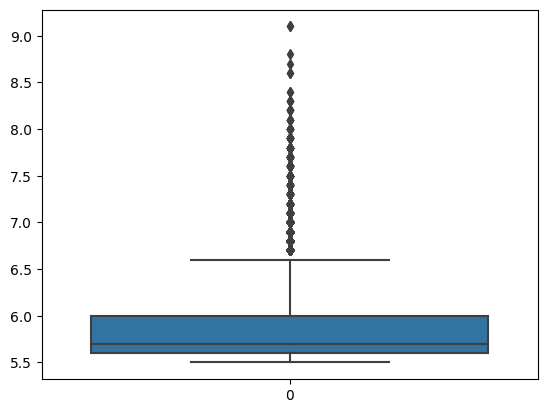

In [34]:
st.write(sns.boxplot(df_n['Magnitude']))

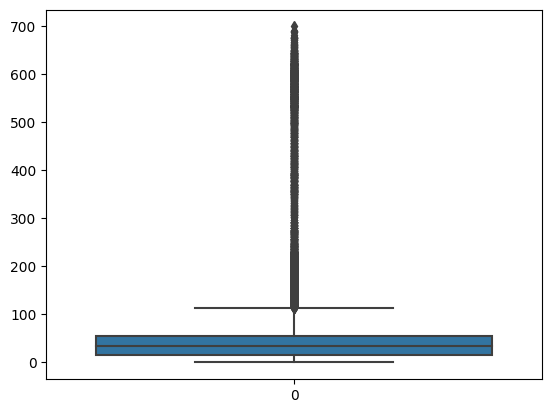

In [35]:
st.write(sns.boxplot(df_n['Depth']))

In [36]:
st.text("what information I need to convey?\
1. what is the statistics of earth quake occurrence per last 10 year?\
2. what is the high magnitude of earth quake happened in the last 10 year?\
3.which area of the earth are frequently affected by earth quake?\
4.is there any re-currence or particular trends per year which is known by high frequency of earth quake?\
5.How do we know take prelimenary measure before it happend?")

DeltaGenerator()

In [37]:
st.write('which data columns from the dataframe are important to convey information?')

In [38]:
df_n=df[['datetime', 'ID', 'Source', 'Location Source', 'Latitude', 'Longitude',
       'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
       'Status', 'Root Mean Square']]

In [39]:
st.write(df_n.columns)

In [40]:
st.text("The dataset from 1965 till 2016 didn't help us to make analysis so we limit the data set for only ten years.")

DeltaGenerator()

In [41]:
st.write("1. ten year analysis of data")
df_10=df_n[df_n['datetime'].dt.year>2005]

In [42]:
df_10.head()

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square
17697,2006-01-01 07:11:57,USP000E7B5,US,US,31.394,140.131,Earthquake,10.0,5.6,MWB,US,Reviewed,1.35
17698,2006-01-01 08:47:13,USP000E7B6,US,US,4.735,95.144,Earthquake,51.5,5.5,MWB,US,Reviewed,0.73
17699,2006-01-02 01:01:24,USP000E7CV,US,US,12.361,144.31,Earthquake,35.2,5.7,MWB,US,Reviewed,1.09
17700,2006-01-02 06:10:50,USP000E7DD,US,US,-60.957,-21.606,Earthquake,13.0,7.4,MWC,HRV,Reviewed,1.28
17701,2006-01-02 12:01:46,USP000E7DT,US,US,-4.883,152.343,Earthquake,62.4,5.6,MWC,HRV,Reviewed,0.82


In [43]:
st.write(df_10.datetime.dt.year.unique())

In [44]:
df_10.reset_index(inplace=True)

In [45]:
df_10.drop('index',axis=1,inplace=True)

C:\Users\ritaj\AppData\Local\Temp\ipykernel_27212\4100248425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10.drop('index',axis=1,inplace=True)


In [46]:
st.text("what is the maximum magnitude of earth quake occured in this 10 year and in which year?")

DeltaGenerator()

In [47]:
st.write("Sort value of the ten dataframe per the time")

In [48]:
st.write(df_10.head())

In [49]:
df_10=df_10.sort_values(by='datetime')

In [50]:
st.write("The maximum amount of the magnitude of earth quake in the ten years")

In [51]:
st.write(df_10.loc[df_10['Magnitude']==df_10['Magnitude'].max()][['datetime','Magnitude','Location Source']])

In [52]:
st.write(df_10.loc[df_10['Magnitude']==df_10['Magnitude'].min()][['datetime','Magnitude']])

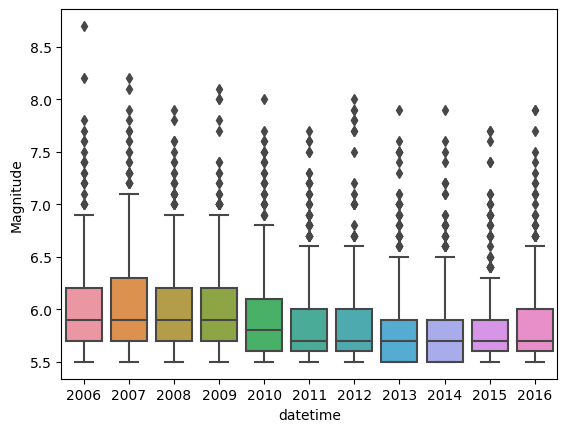

In [53]:
st.write(sns.boxplot(df_10,x=df_10.datetime.dt.year,y=df.Magnitude))

In [54]:
st.write("Let us see the ten year trend of earth quake occurence per ten year")

In [55]:
x=df_10.datetime.dt.year.unique()

In [56]:
st.write(x)

In [57]:
x

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [58]:
len(df_10)

5714

In [59]:
y=df_10.groupby(df_10.datetime.dt.year)['Magnitude'].count()

In [60]:
st.write(y)

In [61]:
y

datetime
2006    508
2007    608
2008    508
2009    517
2010    560
2011    712
2012    445
2013    461
2014    480
2015    446
2016    469
Name: Magnitude, dtype: int64

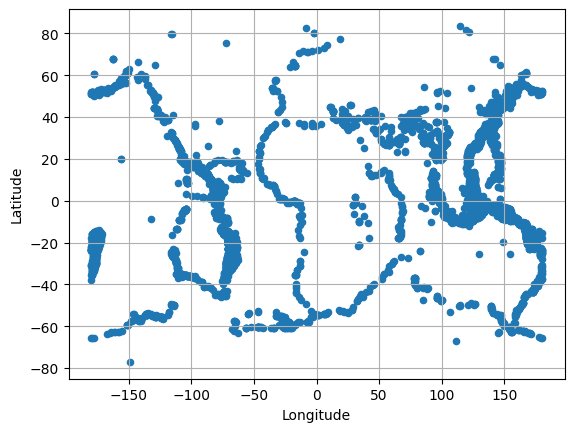

In [62]:
st.write(df_10.plot(kind='scatter',x='Longitude',y='Latitude',grid=True))

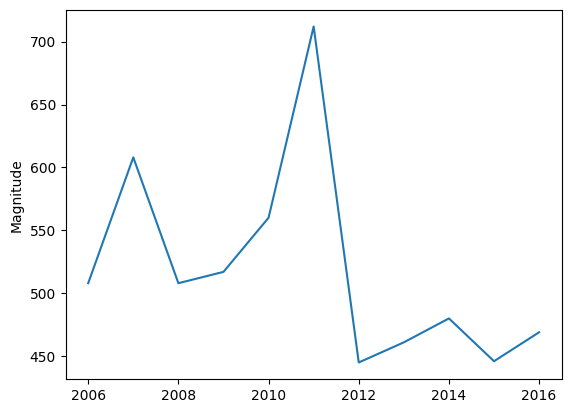

In [63]:
st.write(sns.lineplot(x=x,y=y))

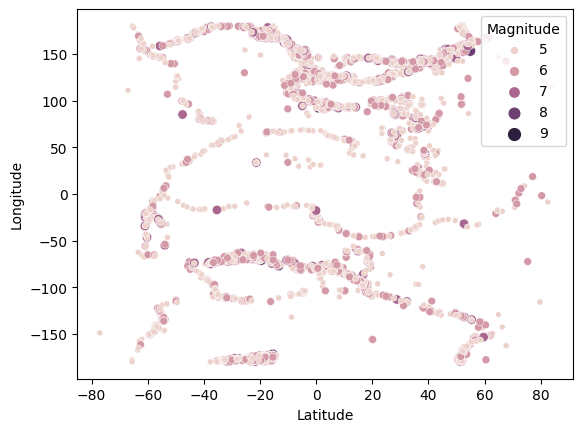

In [64]:
st.write(sns.scatterplot(df_10,x='Latitude',y='Longitude',size=df_10['Magnitude'].astype('int64'),hue=df_10['Magnitude'].astype('int64')))

which are more frequently affected by earth quake?


In [65]:
import matplotlib.pyplot as plt

C:\Users\ritaj\AppData\Local\Temp\ipykernel_27212\3183117934.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\ritaj\AppData\Local\Temp\ipykernel_27212\3183117934.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_10['Depth'])


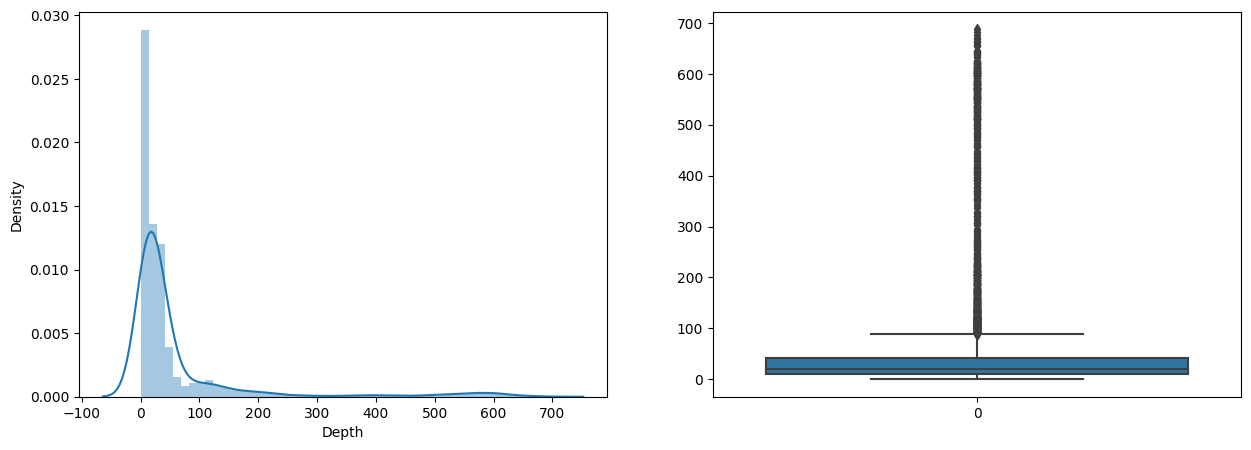

In [66]:
plt.subplots(figsize=(15, 5))
 
plt.subplot(1, 2, 1)
sns.distplot(df_10['Depth'])
 
plt.subplot(1, 2, 2)
sns.boxplot(df_10['Depth'])
plt.show()

In [67]:
df_10.columns

Index(['datetime', 'ID', 'Source', 'Location Source', 'Latitude', 'Longitude',
       'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
       'Status', 'Root Mean Square'],
      dtype='object')

In [68]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)  

In [69]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import chart_studio.plotly as py

In [71]:
import plotly.express as px

In [72]:
#fig_w = px.scatter_geo(df_10, lat='Latitude',
   #lon='Longitude',
   #color="Magnitude",
   #scope='usa')
#fig_w.show()

In [75]:
#fig = px.scatter_geo(df_10, lat=df_10['Latitude'], lon=df_10['Longitude'],\
   #                  size=df_10['Magnitude'].astype('int64'), size_max=10,scope='usa',
    #                 title='Earthquakes Around USA')
#fig.show()


In [76]:
#fig = px.scatter_geo(df_10, lat=df_10['Latitude'], lon=df_10['Longitude'],
        #             size=df_10['Magnitude'].astype('int64'), size_max=10,scope='asia',
         #            title='Earthquakes Around Asia')
#fig.show()

In [77]:
#fig = px.scatter_geo(df_10, lat=df_10['Latitude'], lon=df_10['Longitude'],
        #            title='Earthquakes Around Europe')
#fig.show()

In [78]:
df_10['cord']=list(zip(df_10.Longitude.astype('int64'), df_10.Latitude.astype('int64')))

In [79]:
def cont(data):
    continents = []
    for lat,lon in data:
        if (-35.0 <= lat <= 37.0) and (-17.0 <= lon <= 51.0):
            continents.append('Africa')
        elif (36.0 <= lat <= 71.0) and (-25.0 <= lon <= 45.0):
            continents.append('Europe')
        elif (-10.0 <= lat <= 81.0) and (25.0 <= lon <= 180.0):
            continents.append('Asia')
        elif (5.0 <= lat <= 83.0) and (-168.0 <= lon <= -52.0):
            continents.append('North America')
        elif (-56.0 <= lat <= 13.0) and (-81.0 <= lon <= -34.0):
            continents.append('South America')
        elif (-50.0 <= lat <= -10.0) and (110.0 <= lon <= 155.0):
            continents.append('Australia')
        elif (-90.0 <= lat <= -60.0) and (-180.0 <= lon <= 180.0):
            continents.append('Antarctica')
        else:
            continents.append('Undefined')
    return continents
        
    
    
     


    

In [80]:
data=[x for x in df_10['cord']]

In [81]:
df_10['Continent']=cont(data)

In [82]:
df_cont=df_10[df_10['Continent']!='Undefined']

In [ ]:
df_cont[(df_cont['Continent']=='Asia')==True]

<Axes: xlabel='Continent', ylabel='Magnitude'>

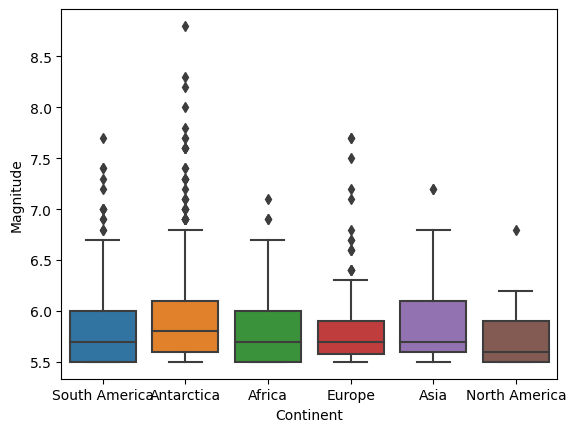

In [85]:
sns.boxplot(df_cont,x=df_cont.Continent,y=df_cont.Magnitude)

In [86]:
df_cont.columns

Index(['datetime', 'ID', 'Source', 'Location Source', 'Latitude', 'Longitude',
       'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
       'Status', 'Root Mean Square', 'cord', 'Continent'],
      dtype='object')

In [88]:
df_cont.groupby('Continent').count()

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord
Continent,,,,,,,,,,,,,,
Africa,162,162,162,162,162,162,162,162,162,162,162,162,142,162
Antarctica,694,694,694,694,694,694,694,694,694,694,694,694,651,694
Asia,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Europe,168,168,168,168,168,168,168,168,168,168,168,168,155,168
North America,16,16,16,16,16,16,16,16,16,16,16,16,16,16
South America,165,165,165,165,165,165,165,165,165,165,165,165,165,165


In [92]:
df_cont.groupby(df_cont.Continent)['Magnitude'].count()

Continent
Africa           162
Antarctica       694
Asia              38
Europe           168
North America     16
South America    165
Name: Magnitude, dtype: int64

In [99]:
df_cont['Continent'].unique()

array(['South America', 'Antarctica', 'Africa', 'Europe', 'Asia',
       'North America'], dtype=object)

In [103]:
continent=[x for x in df_cont['Continent'].unique() ]

In [102]:
continet

['South America', 'Antarctica', 'Africa', 'Europe', 'Asia', 'North America']

In [104]:
count=[x for x in df_cont.groupby(df_cont.Continent)['Magnitude'].count()]

In [105]:
count

[162, 694, 38, 168, 16, 165]

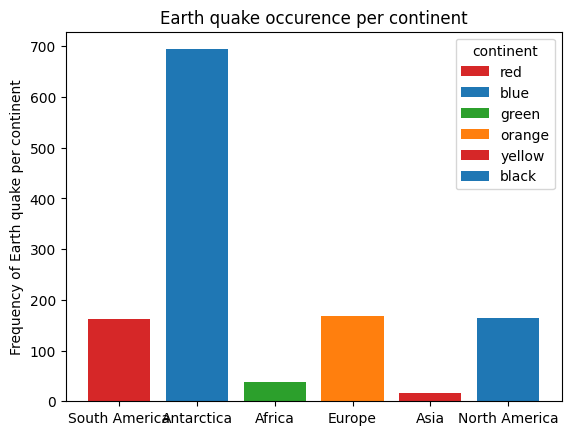

In [114]:

fig, ax = plt.subplots()

continent = [x for x in df_cont['Continent'].unique()]
counts = [x for x in df_cont.groupby(df_cont.Continent)['Magnitude'].count()]

bar_labels = ['red', 'blue', 'green', 'orange','yellow','black']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:red','tab:blue']

ax.bar(continent, counts,label=bar_labels, color=bar_colors)

ax.set_ylabel('Frequency of Earth quake per continent')
ax.set_title('Earth quake occurence per continent')
ax.legend(title='continent')

plt.show()

In [115]:
# which continent experince high magnitude of Earth quake?

In [123]:
np.where(df_cont['Magnitude'].max())

(array([0], dtype=int64),)

In [125]:
df_cont=df_10[df_10['Continent']!='Undefined']

In [126]:
df_10

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord,Continent
0,2006-01-01 07:11:57,USP000E7B5,US,US,31.394,140.131,Earthquake,10.0,5.6,MWB,US,Reviewed,1.35,"(140, 31)",Undefined
1,2006-01-01 08:47:13,USP000E7B6,US,US,4.735,95.144,Earthquake,51.5,5.5,MWB,US,Reviewed,0.73,"(95, 4)",Undefined
2,2006-01-02 01:01:24,USP000E7CV,US,US,12.361,144.31,Earthquake,35.2,5.7,MWB,US,Reviewed,1.09,"(144, 12)",Undefined
3,2006-01-02 06:10:50,USP000E7DD,US,US,-60.957,-21.606,Earthquake,13.0,7.4,MWC,HRV,Reviewed,1.28,"(-21, -60)",South America
4,2006-01-02 12:01:46,USP000E7DT,US,US,-4.883,152.343,Earthquake,62.4,5.6,MWC,HRV,Reviewed,0.82,"(152, -4)",Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,2016-12-28 08:22:12,NN00570710,NN,NN,38.3917,-118.8941,Earthquake,12.3,5.6,ML,NN,Reviewed,0.1898,"(-118, 38)",Undefined
5710,2016-12-28 09:13:47,NN00570744,NN,NN,38.3777,-118.8957,Earthquake,8.8,5.5,ML,NN,Reviewed,0.2187,"(-118, 38)",Undefined
5711,2016-12-28 12:38:51,US10007NAF,US,US,36.9179,140.4262,Earthquake,10.0,5.9,MWW,US,Reviewed,1.52,"(140, 36)",Undefined
5712,2016-12-29 22:30:19,US10007NL0,US,US,-9.0283,118.6639,Earthquake,79.0,6.3,MWW,US,Reviewed,1.43,"(118, -9)",Undefined


In [129]:
df_10[df_10['Continent']!='Undefined']

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord,Continent
3,2006-01-02 06:10:50,USP000E7DD,US,US,-60.957,-21.606,Earthquake,13.0,7.4,MWC,HRV,Reviewed,1.28,"(-21, -60)",South America
8,2006-01-04 13:01:33,USP000E7K8,US,US,-22.855,-66.172,Earthquake,242.8,5.5,MWC,HRV,Reviewed,0.99,"(-66, -22)",Antarctica
9,2006-01-05 08:40:46,USP000E7MY,US,US,-56.552,-24.954,Earthquake,10.0,5.7,MWC,HRV,Reviewed,1.22,"(-24, -56)",South America
10,2006-01-06 03:39:59,USP000E7PH,US,US,6.635,-82.337,Earthquake,7.4,6.1,MWB,US,Reviewed,1.05,"(-82, 6)",Antarctica
12,2006-01-08 11:34:56,USP000E7U3,US,US,36.311,23.212,Earthquake,66.0,6.7,MWB,US,Reviewed,1.34,"(23, 36)",Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,2016-12-16 11:34:58,US2000819R,US,US,14.0882,-90.8691,Earthquake,71.26,5.5,MWW,US,Reviewed,1.26,"(-90, 14)",Antarctica
5696,2016-12-18 13:30:11,US200082AN,US,US,-9.964,-70.9714,Earthquake,622.54,6.4,MWW,US,Reviewed,0.65,"(-70, -9)",Antarctica
5705,2016-12-25 14:22:27,US10007MN3,US,US,-43.4029,-73.9395,Earthquake,38.0,7.6,MWW,US,Reviewed,0.8,"(-73, -43)",Antarctica
5706,2016-12-25 14:32:13,US10007MNB,US,US,-43.481,-74.4771,Earthquake,14.93,5.6,MB,US,Reviewed,0.52,"(-74, -43)",Antarctica


In [130]:
df_10[df_10['Continent']!='Undefined']

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord,Continent
3,2006-01-02 06:10:50,USP000E7DD,US,US,-60.957,-21.606,Earthquake,13.0,7.4,MWC,HRV,Reviewed,1.28,"(-21, -60)",South America
8,2006-01-04 13:01:33,USP000E7K8,US,US,-22.855,-66.172,Earthquake,242.8,5.5,MWC,HRV,Reviewed,0.99,"(-66, -22)",Antarctica
9,2006-01-05 08:40:46,USP000E7MY,US,US,-56.552,-24.954,Earthquake,10.0,5.7,MWC,HRV,Reviewed,1.22,"(-24, -56)",South America
10,2006-01-06 03:39:59,USP000E7PH,US,US,6.635,-82.337,Earthquake,7.4,6.1,MWB,US,Reviewed,1.05,"(-82, 6)",Antarctica
12,2006-01-08 11:34:56,USP000E7U3,US,US,36.311,23.212,Earthquake,66.0,6.7,MWB,US,Reviewed,1.34,"(23, 36)",Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,2016-12-16 11:34:58,US2000819R,US,US,14.0882,-90.8691,Earthquake,71.26,5.5,MWW,US,Reviewed,1.26,"(-90, 14)",Antarctica
5696,2016-12-18 13:30:11,US200082AN,US,US,-9.964,-70.9714,Earthquake,622.54,6.4,MWW,US,Reviewed,0.65,"(-70, -9)",Antarctica
5705,2016-12-25 14:22:27,US10007MN3,US,US,-43.4029,-73.9395,Earthquake,38.0,7.6,MWW,US,Reviewed,0.8,"(-73, -43)",Antarctica
5706,2016-12-25 14:32:13,US10007MNB,US,US,-43.481,-74.4771,Earthquake,14.93,5.6,MB,US,Reviewed,0.52,"(-74, -43)",Antarctica


In [131]:
df_10=df_10[df_10['Continent'] !='Undefined']

In [132]:
df_10.head()

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord,Continent
3,2006-01-02 06:10:50,USP000E7DD,US,US,-60.957,-21.606,Earthquake,13.0,7.4,MWC,HRV,Reviewed,1.28,"(-21, -60)",South America
8,2006-01-04 13:01:33,USP000E7K8,US,US,-22.855,-66.172,Earthquake,242.8,5.5,MWC,HRV,Reviewed,0.99,"(-66, -22)",Antarctica
9,2006-01-05 08:40:46,USP000E7MY,US,US,-56.552,-24.954,Earthquake,10.0,5.7,MWC,HRV,Reviewed,1.22,"(-24, -56)",South America
10,2006-01-06 03:39:59,USP000E7PH,US,US,6.635,-82.337,Earthquake,7.4,6.1,MWB,US,Reviewed,1.05,"(-82, 6)",Antarctica
12,2006-01-08 11:34:56,USP000E7U3,US,US,36.311,23.212,Earthquake,66.0,6.7,MWB,US,Reviewed,1.34,"(23, 36)",Africa


In [133]:
len(df)

23412

In [134]:
df_10.loc[df_10['Magnitude']==df_10['Magnitude'].max()]

,datetime,ID,Source,Location Source,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Root Mean Square,cord,Continent
2231,2010-02-27 06:34:12,OFFICIAL20100227063411530_30,OFFICIAL,US,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL,Reviewed,1.09,"(-72, -36)",Antarctica
